In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.datasets import fetch_openml

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [39]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X = mnist["data"]
y = mnist["target"].astype(np.uint8)
print(mnist.DESCR)

C:\Users\makis\PYTHON\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [40]:
#Dela upp datan i tränings- och testuppsättningar:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
#Förbered datan genom att normalisera pixlarna:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [42]:
# Taking less data to speed up training. 
X_train = X[:5000]
y_train = y[:5000]
X_val = X[5000:6000]
y_val = y[5000:6000]
X_test = X[6000:]
y_test = y[6000:]

# Standardizing the data (as you generally always should do when using SVM models).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Only transforming the validation data. 
X_test_scaled = scaler.transform(X_test)  # Only transforming the test data. 

In [43]:
#Skapa en logistisk regression modell
log_reg = LogisticRegression(max_iter=1000,random_state=42)
log_reg_params = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=3, scoring = 'accuracy')
log_reg_grid.fit(X_train_scaled, y_train)
#Utvärdera logistisk regression modellen
log_reg_predictions = log_reg_grid.predict(X_val_scaled)
log_reg_accuracy = accuracy_score(y_val,log_reg_predictions)
print("Accuracy of logistic regression model:", log_reg_accuracy)
print("Best parameters for logistic regression:", log_reg_grid.best_params_)

Accuracy of logistic regression model: 0.908
Best parameters for logistic regression: {'C': 0.01}


In [44]:
rnd_forest = RandomForestClassifier(random_state=42)

rnd_params = {'n_estimators': [100, 150, 200], 'max_depth': [10, 20, 30, None]}

rnd_grid = GridSearchCV(rnd_forest, rnd_params, cv=3, scoring='accuracy', n_jobs=-1)

rnd_grid.fit(X_train_scaled, y_train)

rnd_predictions = rnd_grid.predict(X_val_scaled)

rnd_accuracy = accuracy_score(y_val, rnd_predictions)

print("Accuracy of random forest model:", rnd_accuracy)
print("Best parameters for random forest model:", rnd_grid.best_params_)

Accuracy of random forest model: 0.943
Best parameters for random forest model: {'max_depth': 20, 'n_estimators': 200}


In [45]:
#Hitta bäst model

if log_reg_accuracy > rnd_accuracy:
    print("Logistic regression model is better.")
else:
    print("Random forest model is better.")

Random forest model is better.


In [54]:
y_pred = rnd_grid.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of best performing model on test set:", accuracy)

Accuracy of best performing model on test set: 0.937640625


In [78]:
y[7]

3

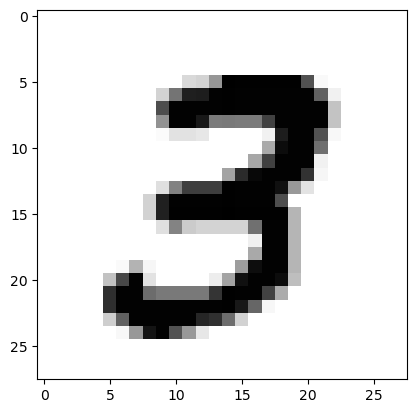

In [79]:
some_digit = X[7]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)

In [80]:
print(X_train.shape)
print(y_train.shape)

(5000, 784)
(5000,)


In [81]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

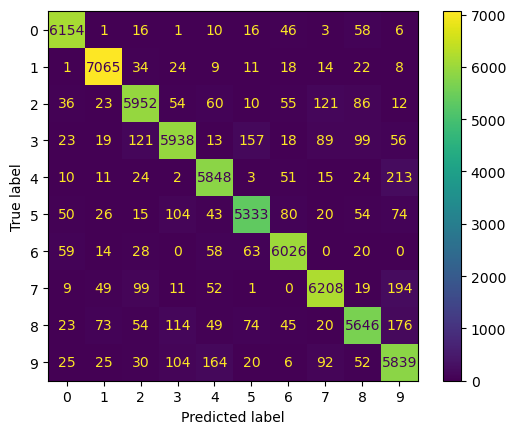

In [73]:
display_confusion_matrix(y_test, y_pred)